In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from random import randrange
# from random import seed
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
# from sklearn.datasets import load_iris
# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import KFold

In [2]:
# Parameters - Equity Index. For example S&P500. Overall market movement
# X = Overall Market , Sentiment Score, Inflation
# y = Trend(Up,Down,Same)

In [3]:
aapl = pd.read_csv("./StockPrice/AAPL_5Y.csv")
aapl = aapl[["Date", "Open"]]  # Only Storing Opening Price over time
aapl["Date"] = pd.to_datetime(aapl["Date"])
aapl["Open"] = aapl["Open"].apply(lambda a: float(a.replace("$", "")))
aapl.sort_values("Date", inplace=True)
aapl.reset_index(drop="index", inplace=True)
aapl.set_index("Date", inplace=True)


In [4]:
amzn = pd.read_csv("./StockPrice/AMZN_5Y.csv")
amzn = amzn[["Date", "Open"]]  # Only Storing Opening Price over time
amzn["Date"] = pd.to_datetime(amzn["Date"])
amzn["Open"] = amzn["Open"].apply(lambda a: float(a.replace("$", "")))
amzn.sort_values("Date", inplace=True)
amzn.reset_index(drop="index", inplace=True)
amzn.set_index("Date", inplace=True)


In [5]:
fb = pd.read_csv("./StockPrice/FB_5Y.csv")
fb = fb[["Date", "Open"]]  # Only Storing Opening Price over time
fb["Date"] = pd.to_datetime(fb["Date"])
fb["Open"] = fb["Open"].apply(lambda a: float(a.replace("$", "")))
fb.sort_values("Date", inplace=True)
fb.reset_index(drop="index", inplace=True)
fb.set_index("Date", inplace=True)


In [6]:
googl = pd.read_csv("./StockPrice/GOOGL_5Y.csv")
googl = googl[["Date", "Open"]]  # Only Storing Opening Price over time
googl["Date"] = pd.to_datetime(googl["Date"])
googl["Open"] = googl["Open"].apply(lambda a: float(a.replace("$", "")))
googl.sort_values("Date", inplace=True)
googl.reset_index(drop="index", inplace=True)
googl.set_index("Date", inplace=True)


In [7]:
nflx = pd.read_csv("./StockPrice/GOOGL_5Y.csv")
nflx = nflx[["Date", "Open"]]  # Only Storing Opening Price over time
nflx["Date"] = pd.to_datetime(nflx["Date"])
nflx["Open"] = nflx["Open"].apply(lambda a: float(a.replace("$", "")))
nflx.sort_values("Date", inplace=True)
nflx.reset_index(drop="index", inplace=True)
nflx.set_index("Date", inplace=True)


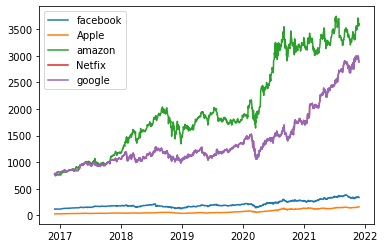

In [8]:
plt.plot(fb.index, fb['Open'],label="facebook")
plt.plot(aapl.index, aapl['Open'],label="Apple")
plt.plot(amzn.index, amzn['Open'],label="amazon")
plt.plot(nflx.index, nflx['Open'],label="Netfix")
plt.plot(googl.index, googl['Open'],label="google")
plt.legend()
plt.show()

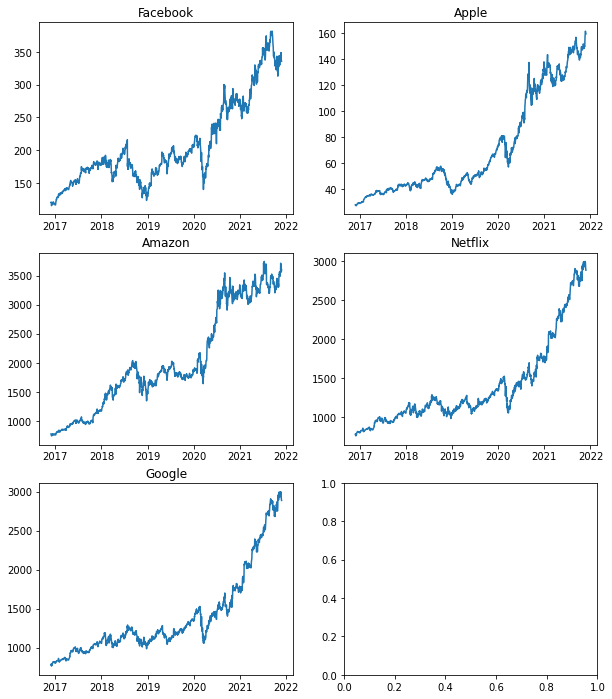

In [9]:
# Multiplot Version

figure, axes = plt.subplots(nrows=3, ncols=2)
axes[0,0].plot(fb.index, fb['Open'])
axes[0,0].title.set_text("Facebook")

axes[0,1].plot(aapl.index, aapl['Open'])
axes[0,1].title.set_text("Apple")

axes[1,0].plot(amzn.index, amzn['Open'])
axes[1,0].title.set_text("Amazon")

axes[1,1].plot(nflx.index, nflx['Open'])
axes[1,1].title.set_text("Netflix")

axes[2,0].plot(googl.index, googl['Open'])
axes[2,0].title.set_text("Google")

# figure.tight_layout()
figure.set_size_inches(10,12, forward=True)
plt.show()

In [10]:
# Calculating Overall Market

s_and_p500 = pd.read_csv("./OtherParams/S&P500_5Y.csv")
# Only Storing Opening Price over time
s_and_p500 = s_and_p500[["Date", "Open"]]
s_and_p500["Date"] = pd.to_datetime(s_and_p500["Date"])
s_and_p500.sort_values("Date", inplace=True)
s_and_p500.reset_index(drop="index", inplace=True)
s_and_p500.set_index("Date", inplace=True)

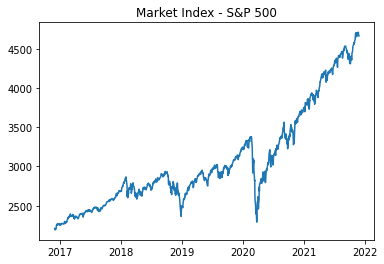

In [11]:
plt.plot(s_and_p500.index,s_and_p500["Open"])
plt.title("Market Index - S&P 500")
plt.show()

In [12]:
def formatDate(row):
    date = row.date.split(" ")[0].split("-")
    return pd.to_datetime(date[0] + "-" + date[1] + "-" + date[2]) #"2020-10-21"
    # return pd.to_datetime(str(row.date.year)  + "-" + str(row.date.month) + "-" + str(row.date.day))

In [13]:
# Import Tweets test, sentiment, date, etc

Benzinga = pd.read_csv("./AccountTweets/Benzinga_OnlyFAANG.csv",
                       index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
Benzinga["date"] = Benzinga.apply(formatDate,axis=1)

Breakout = pd.read_csv("./AccountTweets/BreakoutStocks_OnlyFAANG.csv",
                       index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
Breakout["date"] = Breakout.apply(formatDate,axis=1)

IBD_investors = pd.read_csv("./AccountTweets/IBDinvestors_OnlyFAANG.csv",
                            index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
IBD_investors["date"] = IBD_investors.apply(formatDate,axis=1)

ny_times = pd.read_csv("./AccountTweets/nytimesbusiness_OnlyFAANG.csv",
                       index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
ny_times["date"] = ny_times.apply(formatDate,axis=1)

Stock_Twits = pd.read_csv("./AccountTweets/Stocktwits_OnlyFAANG.csv",
                          index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
Stock_Twits["date"] = Stock_Twits.apply(formatDate,axis=1)

BeSpokeInvest = pd.read_csv("./AccountTweets/bespokeinvest_OnlyFAANG.csv",
                          index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
BeSpokeInvest["date"] = BeSpokeInvest.apply(formatDate,axis=1)

EmmetlSavage = pd.read_csv("./AccountTweets/emmetlsavage_OnlyFAANG.csv",
                          index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
EmmetlSavage["date"] = EmmetlSavage.apply(formatDate,axis=1)

TMFJMo = pd.read_csv("./AccountTweets/TMFJMo_OnlyFAANG.csv",
                          index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
TMFJMo["date"] = TMFJMo.apply(formatDate,axis=1)

cnbc = pd.read_csv("./AccountTweets/CNBC_OnlyFAANG.csv",
                          index_col=0).reset_index(drop="index")[["date", "sentiment", "BelongsTo","sentiment_continuous"]]
cnbc["date"] = cnbc.apply(formatDate,axis=1)

account_data_and_names = [
    (Benzinga,"Benzinga"),
    (Breakout,"Breakout"),
    (IBD_investors, "IBD Investors"),
    (ny_times,"New York Times Business"),
    (Stock_Twits,"Stock Twits"),
    (BeSpokeInvest, "Bespoke Invest"),
    (EmmetlSavage, "Emmet Savage"),
    (TMFJMo, "Jason A Moser"),
    (cnbc, "CNBC")
    ]

In [14]:
cnbc

# Each row is a PPSt
# Sentiment Continues is the exact sentiment extracted from NLTK so it determines how positive or negative a tweet is
# Sentiment is "sentiment_conitnuous" but put into categories = negative positive and neutral

date sentiment BelongsTo  sentiment_continuous
0   2021-11-27  negative        FB             -0.150000
1   2021-11-27  negative      AAPL             -0.400000
2   2021-11-27  positive      AMZN              0.200000
3   2021-11-27   neutral      AMZN              0.000000
4   2021-11-26   neutral        FB              0.000000
..         ...       ...       ...                   ...
140 2021-11-11  positive        FB              1.000000
141 2021-11-11  negative      AAPL             -0.400000
142 2021-11-11  positive        FB              1.000000
143 2021-11-11  positive      AAPL              0.136364
144 2021-11-11  positive        FB              0.350000

[145 rows x 4 columns]

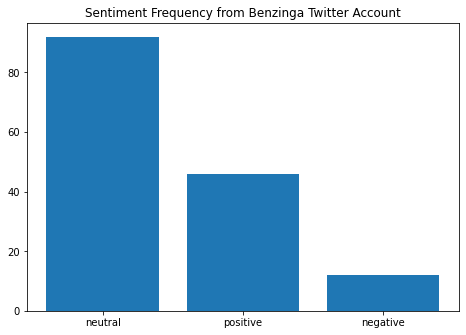

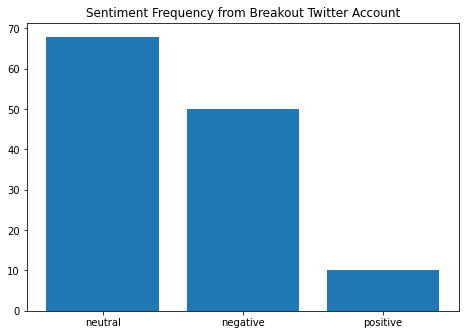

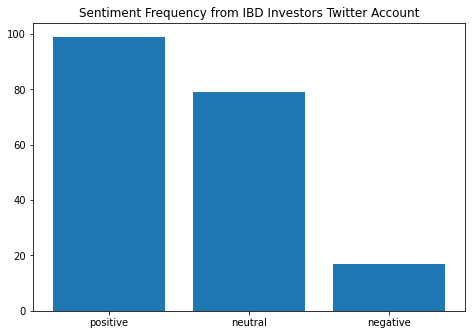

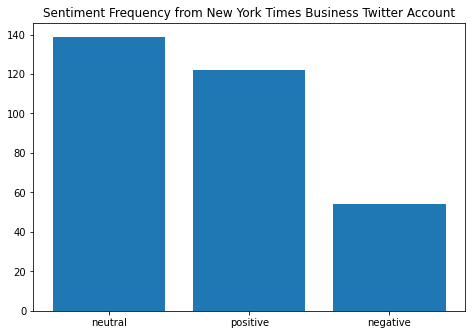

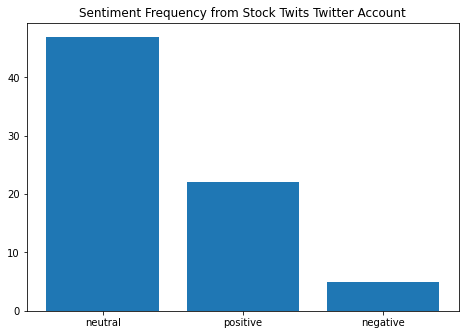

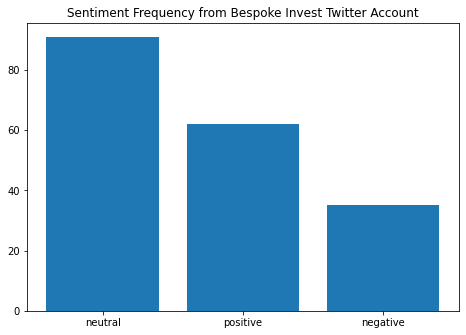

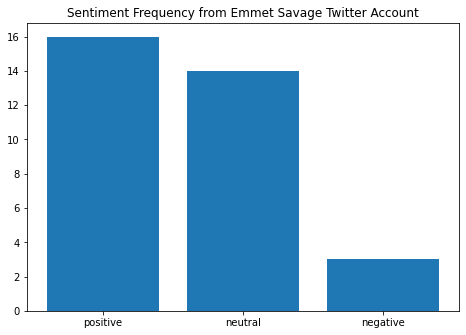

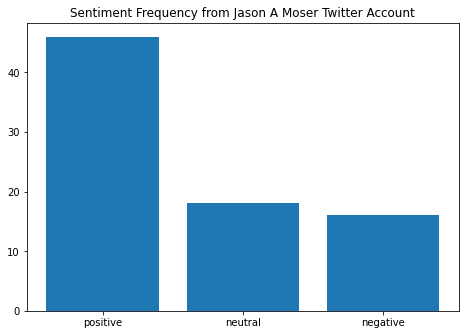

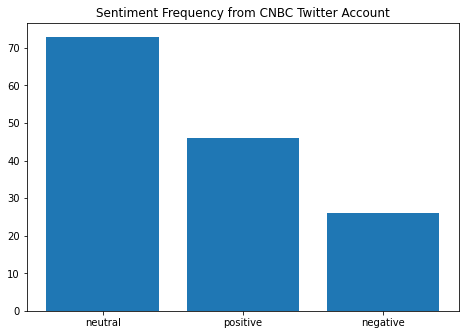

In [15]:
for account in account_data_and_names:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sentiment_counts = account[0].sentiment.value_counts().index.to_list() # [87, 59, 11]
    sentiments = account[0].sentiment.value_counts().to_list() # ['neutral', 'positive', 'negative']
    ax.bar(sentiment_counts,sentiments)
    ax.set_title(f"Sentiment Frequency from {account[1]} Twitter Account")
    # plt.savefig(f"./plots/{account[1]}_sentiment_frequency.jpg")
    # plt.show()

In [16]:
# Calculating Trend

# onetoseven = np.array([0, 1, 2, 3, 4, 5, 6]).reshape(-1, 1)

# Slope(Obtained by fitting a line using linear regresion LinearRegresson() and getting coef) 
# of the stock market for every stock FAANG and S&P500 every 7 days "cummulative" and then put
# into categories or Up(2), Down(0) or Same(1)
def computeTrend(price):  # Trend(Up,Down,Same) coef = slope
    coef = LinearRegression().fit(np.array([i for i in range(price.size)]).reshape(-1, 1), price).coef_[0]
    if(coef < -1):  # Down
        return 0
    if(coef > -1 and coef < 1):  # Same
        return 1
    else:  # Up
        return 2

# def computeTrendMarket(price):  # Trend(Up,Down,Same)
#     return LinearRegression().fit(onetoseven, price).coef_[0]

    
# Slope of the stock market for every stock FAANG and S&P500 every 7 days "cummulative" 
def computeTrendMarketStocks(price):  # Trend 1.2334, 4.23,-12.4343
    coef = LinearRegression().fit(np.array([i for i in range(price.size)]).reshape(-1, 1), price).coef_[0]
    return coef


fb["Trend_Seven"] = fb.rolling(window=7).apply(computeTrend, raw=False)
aapl["Trend_Seven"] = aapl.rolling(window=7).apply(computeTrend, raw=False)
amzn["Trend_Seven"] = amzn.rolling(window=7).apply(computeTrend, raw=False)
nflx["Trend_Seven"] = nflx.rolling(window=7).apply(computeTrend, raw=False)
googl["Trend_Seven"] = googl.rolling(window=7).apply(computeTrend, raw=False)

## Rolling window of size 7 meaning that the day 7 will contain the information on the slope of the opening stock prices for the 
# past 7 days
s_and_p500["Trend_Seven"] = s_and_p500.rolling(window=7).apply(computeTrendMarketStocks, raw=False)
fb["Trend_Seven_Coef"] = fb.Open.rolling(window=7).apply(computeTrendMarketStocks,raw=False)
aapl["Trend_Seven_Coef"] = aapl.Open.rolling(window=7).apply(computeTrendMarketStocks, raw=False)
amzn["Trend_Seven_Coef"] = amzn.Open.rolling(window=7).apply(computeTrendMarketStocks, raw=False)
nflx["Trend_Seven_Coef"] = nflx.Open.rolling(window=7).apply(computeTrendMarketStocks, raw=False)
googl["Trend_Seven_Coef"] = googl.Open.rolling(window=7).apply(computeTrendMarketStocks, raw=False)


fb.dropna(inplace=True)
aapl.dropna(inplace=True)
amzn.dropna(inplace=True)
nflx.dropna(inplace=True)
googl.dropna(inplace=True)
s_and_p500.dropna(inplace=True)

In [17]:
fb.iloc[0:10]

Open  Trend_Seven  Trend_Seven_Coef
Date                                             
2016-12-06  117.69          1.0         -0.776429
2016-12-07  117.00          1.0         -0.657143
2016-12-08  117.98          1.0         -0.257143
2016-12-09  119.22          1.0          0.332500
2016-12-12  119.22          1.0          0.684286
2016-12-13  117.86          1.0          0.393214
2016-12-14  120.00          1.0          0.353214
2016-12-15  120.08          1.0          0.425714
2016-12-16  120.90          1.0          0.402143
2016-12-19  119.85          1.0          0.266786

In [18]:
# Obtaining Inflation Rate ( US AUG2017 - SEP2021) Monthly Percentage Increase or Decrease

IR = pd.read_csv("./OtherParams/IR_5Y.csv")
IR["Date"] = pd.to_datetime(IR["Date"], format="%d/%m/%Y")

In [19]:
12%24

12

In [20]:
d = pd.date_range(start='8/1/2017', end='10/1/2021', freq='MS') 
d = [d[i] for i in range(len(d)) if(i%2==0)]

In [21]:
IR

Date  InflationRate
0  2021-10-01            0.9
1  2021-09-01            0.2
2  2021-08-01            0.2
3  2021-07-01            0.5
4  2021-06-01            1.1
5  2021-05-01            1.0
6  2021-04-01            1.0
7  2021-03-01            0.9
8  2021-02-01            0.7
9  2021-01-01            0.5
10 2020-12-01            0.1
11 2020-11-01           -0.1
12 2020-10-01            0.0
13 2020-09-01            0.1
14 2020-08-01            0.4
15 2020-07-01            0.6
16 2020-06-01            0.7
17 2020-05-01           -0.1
18 2020-04-01           -0.9
19 2020-03-01           -0.3
20 2020-02-01            0.3
21 2020-01-01            0.4
22 2019-12-01           -0.2
23 2019-11-01           -0.2
24 2019-10-01            0.2
25 2019-09-01            0.0
26 2019-08-01           -0.1
27 2019-07-01            0.2
28 2019-06-01           -0.1
29 2019-05-01            0.2
30 2019-04-01            0.6
31 2019-03-01            0.7
32 2019-02-01            0.5
33 2019-01-01            0.2
34 2018-12-01           -0.5
35 2018-11-01           -0.5
36 2018-10-01            0.1
37 2018-09-01            0.1
38 2018-08-01            0.0
39 2018-07-01           -0.1
40 2018-06-01            0.1
41 2018-05-01            0.5
42 2018-04-01            0.4
43 2018-03-01            0.2
44 2018-02-01            0.5
45 2018-01-01            0.6
46 2017-12-01           -0.1
47 2017-11-01           -0.1
48 2017-10-01           -0.2
49 2017-09-01            0.6
50 2017-08-01            0.3

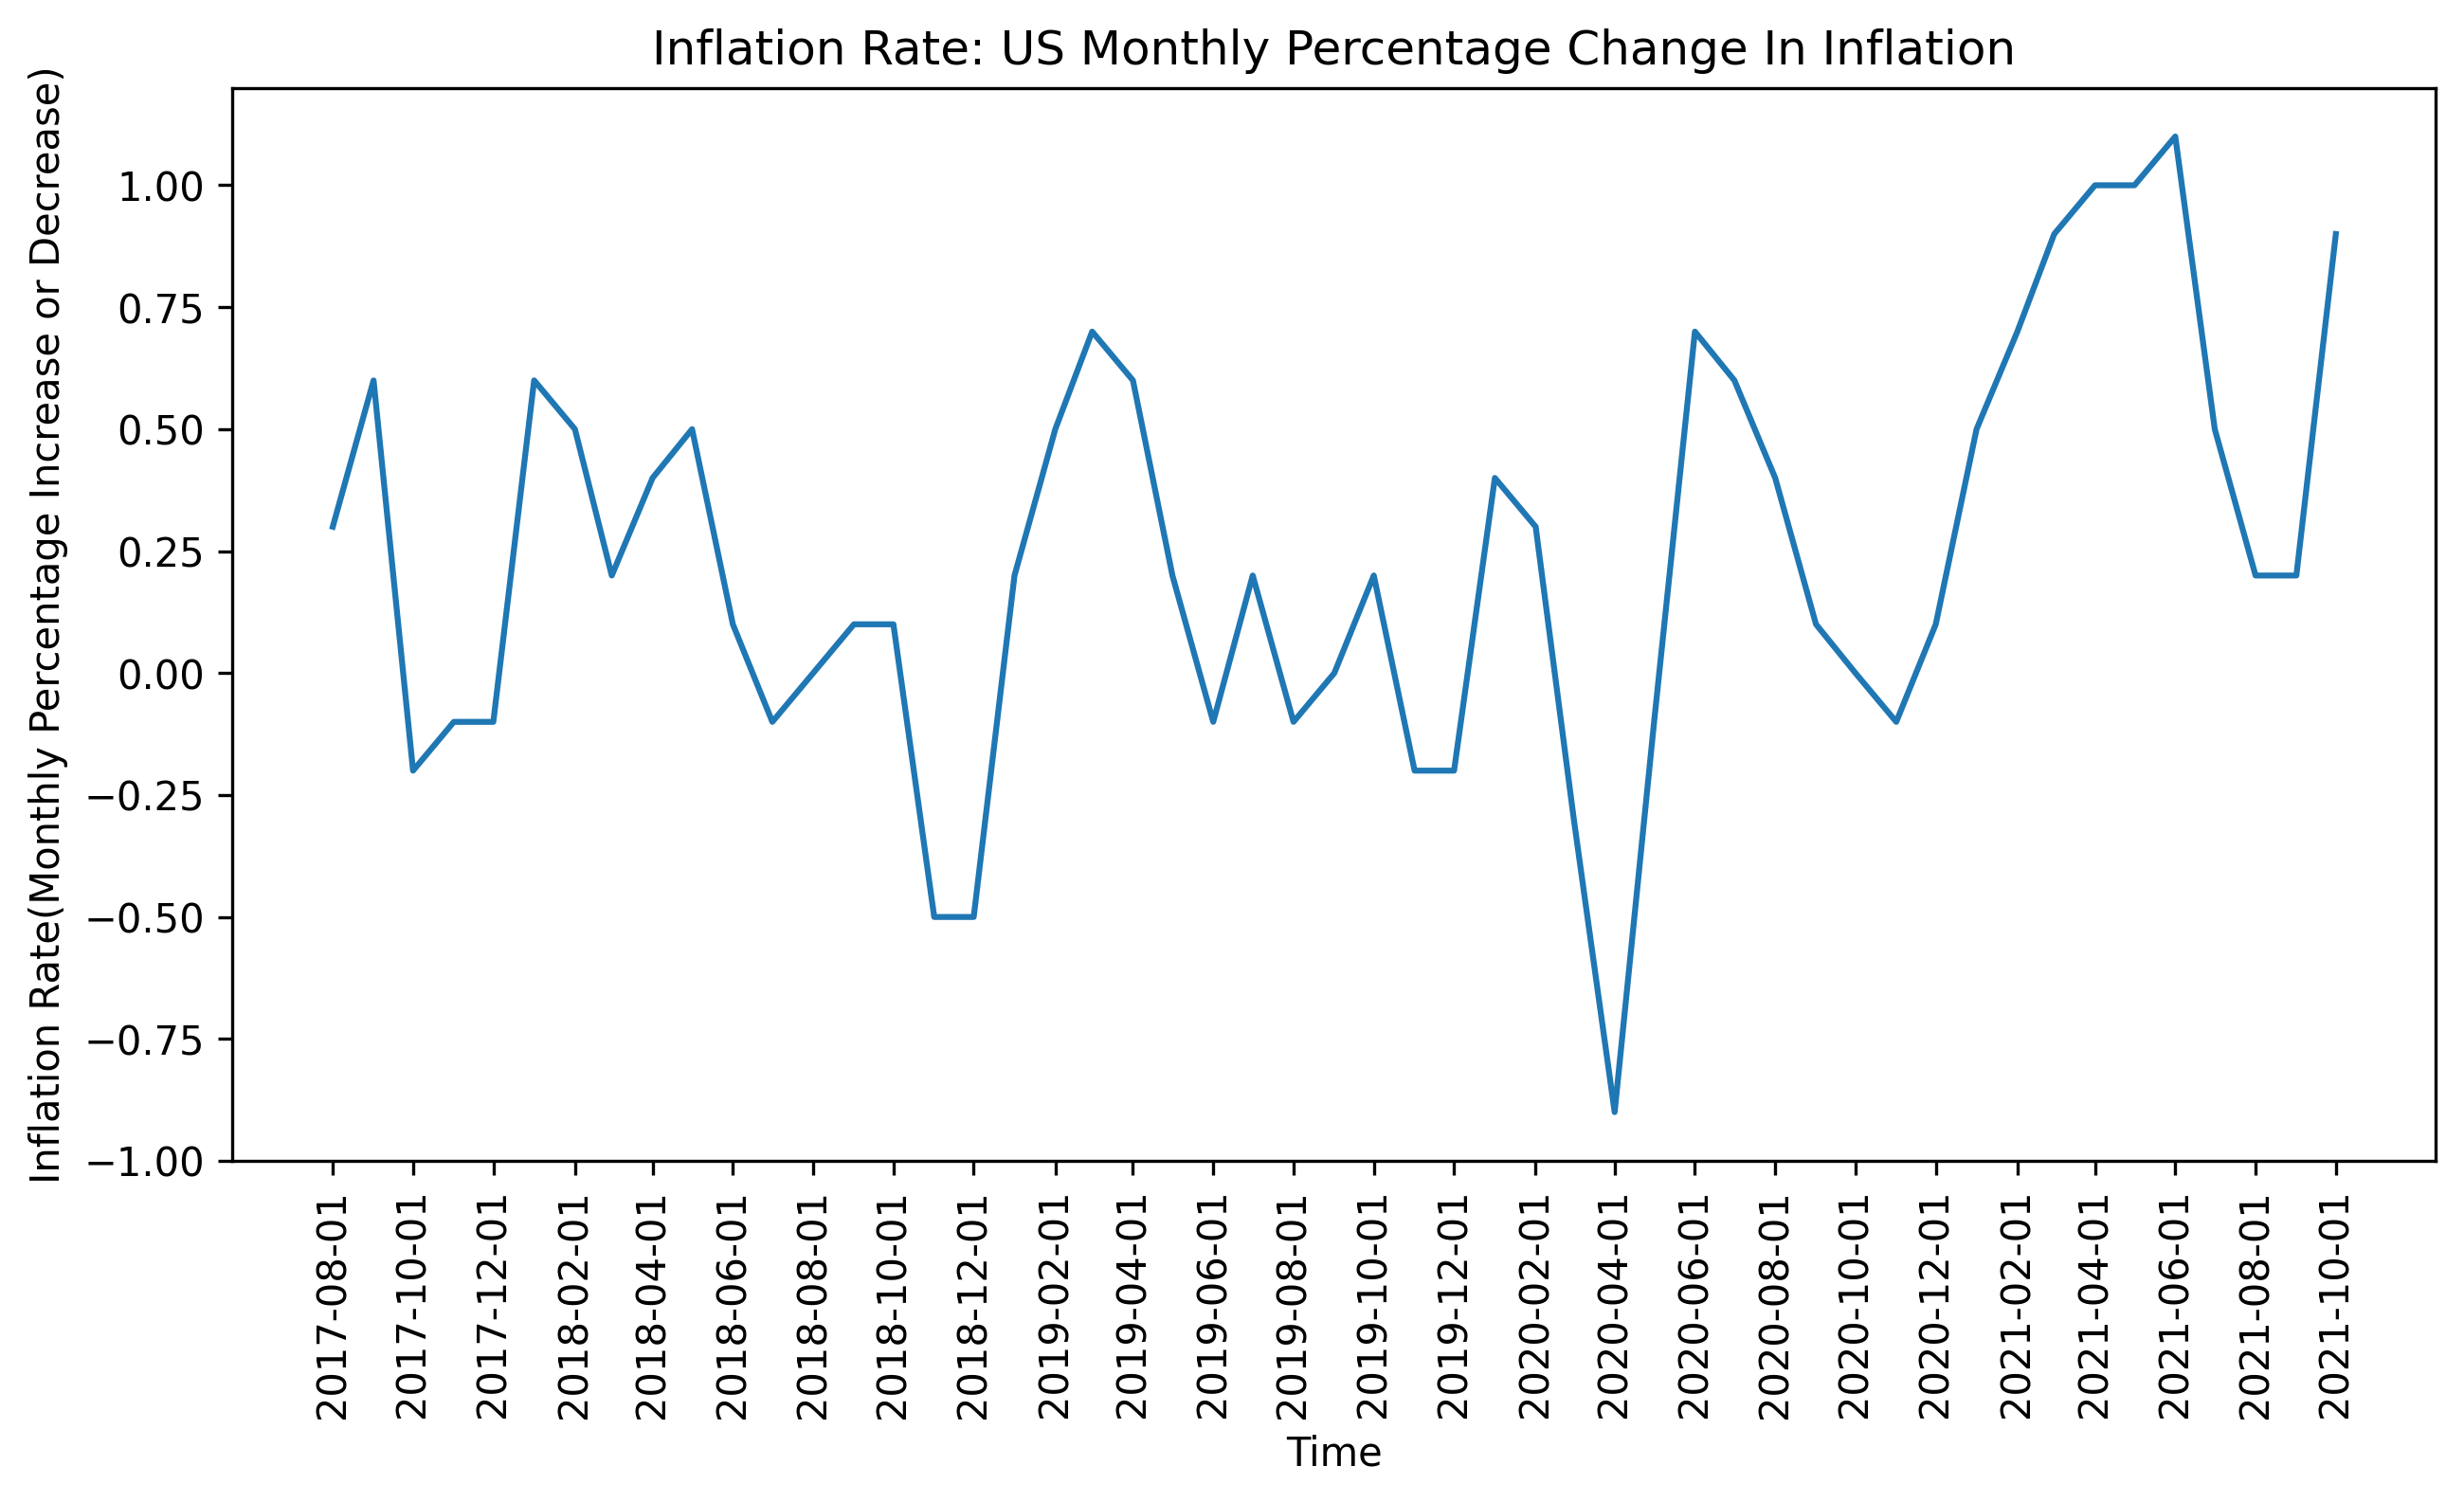

In [22]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(IR["Date"],IR["InflationRate"])
plt.title("Inflation Rate: US Monthly Percentage Change In Inflation")
plt.xticks(d,rotation=90)
plt.xlabel("Time")
plt.ylabel("Inflation Rate(Monthly Percentage Increase or Decrease)")
plt.show()

In [23]:
# Adding Market to each DF. MARKET IS S&P500

fb["Market"] = s_and_p500["Trend_Seven"]
amzn["Market"] = s_and_p500["Trend_Seven"]
aapl["Market"] = s_and_p500["Trend_Seven"]
nflx["Market"] = s_and_p500["Trend_Seven"]
googl["Market"] = s_and_p500["Trend_Seven"]


In [24]:
IR

Date  InflationRate
0  2021-10-01            0.9
1  2021-09-01            0.2
2  2021-08-01            0.2
3  2021-07-01            0.5
4  2021-06-01            1.1
5  2021-05-01            1.0
6  2021-04-01            1.0
7  2021-03-01            0.9
8  2021-02-01            0.7
9  2021-01-01            0.5
10 2020-12-01            0.1
11 2020-11-01           -0.1
12 2020-10-01            0.0
13 2020-09-01            0.1
14 2020-08-01            0.4
15 2020-07-01            0.6
16 2020-06-01            0.7
17 2020-05-01           -0.1
18 2020-04-01           -0.9
19 2020-03-01           -0.3
20 2020-02-01            0.3
21 2020-01-01            0.4
22 2019-12-01           -0.2
23 2019-11-01           -0.2
24 2019-10-01            0.2
25 2019-09-01            0.0
26 2019-08-01           -0.1
27 2019-07-01            0.2
28 2019-06-01           -0.1
29 2019-05-01            0.2
30 2019-04-01            0.6
31 2019-03-01            0.7
32 2019-02-01            0.5
33 2019-01-01            0.2
34 2018-12-01           -0.5
35 2018-11-01           -0.5
36 2018-10-01            0.1
37 2018-09-01            0.1
38 2018-08-01            0.0
39 2018-07-01           -0.1
40 2018-06-01            0.1
41 2018-05-01            0.5
42 2018-04-01            0.4
43 2018-03-01            0.2
44 2018-02-01            0.5
45 2018-01-01            0.6
46 2017-12-01           -0.1
47 2017-11-01           -0.1
48 2017-10-01           -0.2
49 2017-09-01            0.6
50 2017-08-01            0.3

In [25]:
fb.iloc[120:200]

Open  Trend_Seven  Trend_Seven_Coef    Market
Date                                                       
2017-05-31  152.70          1.0          0.874286  4.557500
2017-06-01  151.75          1.0          0.705000  3.085714
2017-06-02  151.85          1.0          0.478214  3.677143
2017-06-05  153.64          1.0          0.322857  4.371786
2017-06-06  153.41          1.0          0.215357  4.293929
...            ...          ...               ...       ...
2017-09-15  170.88          1.0         -0.151071  5.957857
2017-09-18  171.99          1.0         -0.280000  5.917857
2017-09-19  170.62          1.0         -0.393214  4.222500
2017-09-20  172.50          1.0         -0.315357  2.766071
2017-09-21  171.69          1.0         -0.133571  2.678214

[80 rows x 4 columns]

In [26]:
## Adds corresponding inflation rate to each FAANG dataframe based on their month
def add_IR(row):
    ir = (IR[IR["Date"] == pd.to_datetime(str(row.name.year) + "-01-" + str(row.name.month), format="%Y-%d-%m")].InflationRate.values)
    if(len(ir) == 0):
        return np.nan
    else:
        return ir[0]

fb["IR"] = fb.apply(add_IR, axis=1)
fb.dropna(inplace=True)

aapl["IR"] = aapl.apply(add_IR, axis=1)
aapl.dropna(inplace=True)

amzn["IR"] = amzn.apply(add_IR, axis=1)
amzn.dropna(inplace=True)

nflx["IR"] = nflx.apply(add_IR, axis=1)
nflx.dropna(inplace=True)

googl["IR"] = googl.apply(add_IR, axis=1)
googl.dropna(inplace=True)

In [27]:
googl

Open  Trend_Seven  Trend_Seven_Coef     Market   IR
Date                                                              
2017-08-01   947.81          0.0         -6.609286   0.016071  0.3
2017-08-02   948.37          0.0         -4.503929  -0.180714  0.3
2017-08-03   949.10          0.0         -4.030000  -0.307143  0.3
2017-08-04   943.95          0.0         -3.039286   0.022143  0.3
2017-08-07   947.52          0.0         -1.150714   0.888214  0.3
...             ...          ...               ...        ...  ...
2021-10-25  2751.00          0.0        -12.617857  18.489286  0.9
2021-10-26  2785.27          0.0        -15.215714  17.118214  0.9
2021-10-27  2788.10          0.0        -17.368214  13.522500  0.9
2021-10-28  2942.69          2.0          4.839286   8.706786  0.9
2021-10-29  2901.56          2.0         19.822143   6.495000  0.9

[1071 rows x 5 columns]

In [28]:
# Deletes OPEN column. Open NO longer NEEDED
fb = fb[["Market","Trend_Seven","IR","Trend_Seven_Coef"]]
aapl = aapl[["Market","Trend_Seven","IR","Trend_Seven_Coef"]]
amzn = amzn[["Market","Trend_Seven","IR","Trend_Seven_Coef"]]
nflx = nflx[["Market","Trend_Seven","IR","Trend_Seven_Coef"]]
googl = googl[["Market","Trend_Seven","IR","Trend_Seven_Coef"]]

In [29]:
Stock_Twits[Stock_Twits["BelongsTo"] == "GOOGL"].set_index("date",drop="index")

sentiment BelongsTo  sentiment_continuous
date                                                
2021-02-03  positive     GOOGL              0.080000
2021-01-20  positive     GOOGL              0.148182
2020-10-29   neutral     GOOGL              0.000000
2020-10-29   neutral     GOOGL              0.000000

In [30]:
Stock_Twits

date sentiment BelongsTo  sentiment_continuous
0  2021-11-09  positive        FB              0.100000
1  2021-11-03   neutral        FB              0.000000
2  2021-11-02   neutral        FB              0.000000
3  2021-11-01   neutral      AMZN              0.000000
4  2021-10-29  negative      AMZN             -0.066667
..        ...       ...       ...                   ...
69 2020-10-28   neutral      AMZN              0.000000
70 2020-10-21  positive        FB              0.033333
71 2020-10-20   neutral      NFLX              0.000000
72 2020-10-20  positive      NFLX              0.250000
73 2020-10-20   neutral      NFLX              0.000000

[74 rows x 4 columns]

In [31]:
fb.loc[pd.to_datetime("2020-10-21")]

Market             -14.090714
Trend_Seven          1.000000
IR                   0.000000
Trend_Seven_Coef    -0.901786
Name: 2020-10-21 00:00:00, dtype: float64

In [32]:
FB_Final = pd.DataFrame(columns=["sentiment","BelongsTo","Market","Trend_Seven","IR","Trend_Seven_Coef","sentiment_continuous"])
AMZN_Final = pd.DataFrame(columns=["sentiment","BelongsTo","Market","Trend_Seven","IR","Trend_Seven_Coef","sentiment_continuous"])
AAPL_Final = pd.DataFrame(columns=["sentiment","BelongsTo","Market","Trend_Seven","IR","Trend_Seven_Coef","sentiment_continuous"])
NFLX_Final = pd.DataFrame(columns=["sentiment","BelongsTo","Market","Trend_Seven","IR","Trend_Seven_Coef","sentiment_continuous"])
GOOGL_Final = pd.DataFrame(columns=["sentiment","BelongsTo","Market","Trend_Seven","IR","Trend_Seven_Coef","sentiment_continuous"])

for stock in "FB,AAPL,AMZN,NFLX,GOOGL".split(","):
    for source in [i[0] for i in account_data_and_names]:

        twits_for_stock = source[source["BelongsTo"] == stock].set_index("date",drop="index")

        if(stock == "FB"):
            df = pd.merge(twits_for_stock,fb,left_index=True, right_index=True)
            FB_Final = pd.concat([FB_Final,df],ignore_index=True)
        elif (stock == "AAPL"):
            df = pd.merge(twits_for_stock,aapl,left_index=True, right_index=True)
            AAPL_Final = pd.concat([AAPL_Final,df],ignore_index=True)
        elif (stock == "AMZN"):
            df = pd.merge(twits_for_stock,amzn,left_index=True, right_index=True)
            AMZN_Final = pd.concat([AMZN_Final,df],ignore_index=True)
        elif (stock == "NFLX"):
            df = pd.merge(twits_for_stock,nflx,left_index=True, right_index=True)
            NFLX_Final = pd.concat([NFLX_Final,df],ignore_index=True)
        else:
            df = pd.merge(twits_for_stock,googl,left_index=True, right_index=True)
            GOOGL_Final = pd.concat([GOOGL_Final,df],ignore_index=True)

ALL_Stocks = pd.concat([FB_Final,AMZN_Final,AAPL_Final,NFLX_Final,GOOGL_Final],ignore_index=True)

In [33]:
ALL_Stocks

sentiment BelongsTo     Market  Trend_Seven   IR  Trend_Seven_Coef  \
0     neutral        FB -19.854286          0.0  0.2         -5.035714   
1     neutral        FB -19.854286          0.0  0.2         -5.035714   
2     neutral        FB  -9.951786          0.0  0.2         -5.457964   
3     neutral        FB   9.132857          0.0  0.2         -1.977536   
4    positive        FB  -3.480714          1.0  0.2         -0.715500   
..        ...       ...        ...          ...  ...               ...   
866  positive     GOOGL  -3.151071          0.0  0.1        -10.911429   
867   neutral     GOOGL  10.920000          2.0  0.1          4.456964   
868  negative     GOOGL  17.678929          2.0  0.6         19.525000   
869  positive     GOOGL   6.078214          2.0  0.3          2.900714   
870  positive     GOOGL   6.135357          2.0 -0.2          6.982143   

     sentiment_continuous  
0                0.000000  
1                0.000000  
2                0.000000  
3                0.000000  
4                0.250000  
..                    ...  
866              0.500000  
867              0.000000  
868             -0.166667  
869              0.333333  
870              0.600000  

[871 rows x 7 columns]

In [34]:
enc_sentiment = OrdinalEncoder()
ALL_Stocks["sentiment"] = enc_sentiment.fit_transform(ALL_Stocks["sentiment"].to_numpy().reshape(-1,1).tolist())

enc_belongsTo = OrdinalEncoder()
ALL_Stocks["BelongsTo"] = enc_belongsTo.fit_transform(ALL_Stocks["BelongsTo"].to_numpy().reshape(-1,1).tolist())

In [35]:
ALL_Stocks

# convert all rows which contains strings into numbers to train the classifier

sentiment  BelongsTo     Market  Trend_Seven   IR  Trend_Seven_Coef  \
0          1.0        2.0 -19.854286          0.0  0.2         -5.035714   
1          1.0        2.0 -19.854286          0.0  0.2         -5.035714   
2          1.0        2.0  -9.951786          0.0  0.2         -5.457964   
3          1.0        2.0   9.132857          0.0  0.2         -1.977536   
4          2.0        2.0  -3.480714          1.0  0.2         -0.715500   
..         ...        ...        ...          ...  ...               ...   
866        2.0        3.0  -3.151071          0.0  0.1        -10.911429   
867        1.0        3.0  10.920000          2.0  0.1          4.456964   
868        0.0        3.0  17.678929          2.0  0.6         19.525000   
869        2.0        3.0   6.078214          2.0  0.3          2.900714   
870        2.0        3.0   6.135357          2.0 -0.2          6.982143   

     sentiment_continuous  
0                0.000000  
1                0.000000  
2                0.000000  
3                0.000000  
4                0.250000  
..                    ...  
866              0.500000  
867              0.000000  
868             -0.166667  
869              0.333333  
870              0.600000  

[871 rows x 7 columns]

In [36]:
# Creating the model 

# train and test datasets
# this splits training and test sets into 4 subsets
X_train, X_test, y_train, y_test = train_test_split(ALL_Stocks[["Market","sentiment","IR","BelongsTo"]],ALL_Stocks["Trend_Seven"], test_size=0.30,random_state=10)

In [37]:
clf = DecisionTreeClassifier(random_state=10).fit(X_train,y_train)

In [38]:
y_test

538    1.0
686    1.0
774    2.0
75     2.0
855    0.0
      ... 
322    0.0
725    2.0
183    0.0
610    1.0
102    0.0
Name: Trend_Seven, Length: 262, dtype: float64

In [39]:
X_test

Market  sentiment   IR  BelongsTo
538   0.358571        1.0  1.0        0.0
686  21.948571        2.0  1.0        0.0
774   4.413214        1.0  0.2        4.0
75   16.957857        0.0  1.1        2.0
855   0.995357        2.0  0.2        3.0
..         ...        ...  ...        ...
322  -6.865000        1.0  0.2        1.0
725   3.996429        2.0  0.9        4.0
183  -7.743571        1.0  0.2        2.0
610 -16.158571        1.0  0.5        0.0
102  -7.743571        2.0  0.2        2.0

[262 rows x 4 columns]

In [40]:
clf.predict(X_test).reshape(-1,1) # Predicted Values

array([[1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],

In [41]:
y_test # Real/actual values

538    1.0
686    1.0
774    2.0
75     2.0
855    0.0
      ... 
322    0.0
725    2.0
183    0.0
610    1.0
102    0.0
Name: Trend_Seven, Length: 262, dtype: float64

In [42]:
# Classification Problem: Predicting - Using Trend_Seven

In [43]:
X = ALL_Stocks[["sentiment", "BelongsTo", "Market", "IR"]] # features to predict y
y = ALL_Stocks[["Trend_Seven"]].to_numpy().reshape(1,-1)[0]

In [44]:
clf = DecisionTreeClassifier(random_state=10)
score = cross_val_score(clf, X, y, cv=10)
print(f"Decision Tree Classifier Results = Mean:{np.round(score.mean(),decimals=4)} Standard Deviation:{np.round(score.std(),decimals=4)}")

Decision Tree Classifier Results = Mean:0.6993 Standard Deviation:0.0721


In [45]:
clf = RandomForestClassifier(random_state=10)
score = cross_val_score(clf, X, y, cv=10)
print(f"Random Forest Classifier Results = Mean:{np.round(score.mean(),decimals=4)} Standard Deviation:{np.round(score.std(),decimals=4)}")

Random Forest Classifier Results = Mean:0.7165 Standard Deviation:0.0846


In [46]:
clf = GaussianNB()
score = cross_val_score(clf, X, y, cv=10) # 10(K) fold Cross Validation
print(f"Gaussian Naive Bayes Classifier Results = Mean:{np.round(score.mean(),decimals=4)} Standard Deviation:{np.round(score.std(),decimals=4)}")

Gaussian Naive Bayes Classifier Results = Mean:0.5926 Standard Deviation:0.0906


In [47]:
clf = DecisionTreeClassifier(random_state=10).fit(X_train,y_train)
clf.score(X_test,y_test)

0.7900763358778626

# Regression Problem: Predicting - Using Trend_Seven_Coef

In [48]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
X = ALL_Stocks[["sentiment_continuous", "BelongsTo", "Market", "IR"]]
y = ALL_Stocks[["Trend_Seven_Coef"]].to_numpy().reshape(1,-1)[0]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(ALL_Stocks[["Market","sentiment_continuous","IR","BelongsTo"]],ALL_Stocks["Trend_Seven_Coef"], test_size=0.30,random_state=10)
# X_train, X_test, y_train, y_test = train_test_split(ALL_Stocks[["sentiment_continuous"]],ALL_Stocks["Trend_Seven_Coef"], test_size=0.30,random_state=10)

In [51]:
# plt.scatter(ALL_Stocks[["sentiment_continuous"]],ALL_Stocks["Trend_Seven_Coef"])
# plt.xlabel("Sentiment")
# plt.ylabel("Market Trend")
# plt.show()

In [52]:
def calculateModelStatistics(classifier,X_test,real,predicted):
    residuals = [abs(real[i] - predicted[i]) for i in range(real.size) ] # Residuals = Difference between predicted and real values 
    variance = sum( [(val - predicted.mean())**2 for val in real])/(real.size - 1)
    standard_dev = np.sqrt(variance)
    r2 = clf.score(X_test,predicted)
    # Adjusted R2 Score https://stackoverflow.com/questions/51038820/how-to-calculated-the-adjusted-r2-value-using-scikit
    # 1-(1-r2)*(n-1)/(n-p-1)
    n = real.size # Num of observation
    p = 4 # Number of variables
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    mean_sq_err = mean_squared_error(real,predicted)
    # print(f"Variance: {variance}")
    # print(f"Standard Deviation {standard_dev}")
    print(f"mean squared error: {mean_sq_err}")
    print(f"R2 Score: {r2}")
    print(f"Adjusted R2 Score: {adj_r2}")
    print(f"Min Difference(Residual):  {max(residuals)}")
    print(f"Max Difference(Residual):  {min(residuals)}")
    print(f"Standard Deviation of Residuals: {np.var(residuals)}")
    print(f"Variance of Residuals: {np.std(residuals)}")
    print(f"Mean of Residuals: {np.mean(residuals)}")


clf = DecisionTreeRegressor().fit(X_train,y_train)
y_hat = clf.predict(X_test)
print("Statistics for Decision Tree Regression")
calculateModelStatistics(clf,X_test,y_hat,y_test.to_numpy())

clf = SVR().fit(X_train,y_train)
y_hat = clf.predict(X_test)
print("\n\nStatistics for Support Vector Machine Regressor")
calculateModelStatistics(clf,X_test,y_hat,y_test.to_numpy())

Statistics for Decision Tree Regression
mean squared error: 97.8617069943608
R2 Score: -0.03600210674674065
Adjusted R2 Score: -0.052126653155250224
Min Difference(Residual):  55.8335714285714
Max Difference(Residual):  0.0
Standard Deviation of Residuals: 81.79883346194445
Variance of Residuals: 9.044270753462904
Mean of Residuals: 4.007851485823336


Statistics for Support Vector Machine Regressor
mean squared error: 84.03302071722746
R2 Score: 0.11039374671487356
Adjusted R2 Score: 0.09654773499059144
Min Difference(Residual):  39.961767561479974
Max Difference(Residual):  0.014918425855439899
Standard Deviation of Residuals: 56.59366778764014
Variance of Residuals: 7.522876297510158
Mean of Residuals: 5.238258577961509
